In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
np.random.seed(seed=0)

# Importing Data

In [2]:
# sample = 'pbpb'
sample='pp'
low_gev = 80
high_gev = low_gev + 20

data = {}


In [3]:
data = {}
for suffix in ["dijet", "photonjet", "quark", "gluon", "dijet_quark_truth", "photonjet_quark_truth", "dijet_gluon_truth", "photonjet_gluon_truth"]:
    data[suffix] = pd.read_csv(f'ml-export/{sample}_pt{low_gev}{high_gev}_{suffix}.txt', sep=' ', 
                              names=["multiplicity", "ptd", "lha", "width", "mass", "pt01", "pt12", "pt23", "pt34", "pt45", "pt56", "pt67", "pt78", "pt89", "pt910", "pt1020", "pt20+"],
                              index_col=False)

In [4]:
for suffix in ["dijet", "photonjet", "quark", "gluon", "dijet_quark_truth", "photonjet_quark_truth", "dijet_gluon_truth", "photonjet_gluon_truth"]:
    data[suffix]["pt14"] = data[suffix]["pt12"]+data[suffix]["pt23"]+data[suffix]["pt34"]
    data[suffix]["pt410"] = data[suffix]["pt34"]+data[suffix]["pt45"]+data[suffix]["pt56"]+data[suffix]["pt67"]+data[suffix]["pt78"]+data[suffix]["pt89"]+data[suffix]["pt910"]
    data[suffix]["pt10+"] = data[suffix]["pt1020"]+data[suffix]["pt20+"]

In [5]:
data["dijet"].head()

,multiplicity,ptd,lha,width,mass,pt01,pt12,pt23,pt34,pt45,pt56,pt67,pt78,pt89,pt910,pt1020,pt20+,pt14,pt410,pt10+
0,8,0.185576,0.218571,0.053645,0.004387,1,0,1,1,0,0,0,0,1,0,4,0,2,2,4
1,38,0.043528,0.607277,0.398896,0.209494,11,7,12,2,2,2,1,1,0,0,0,0,21,8,0
2,27,0.187701,0.398201,0.206696,0.112226,13,4,6,0,0,1,0,0,0,1,0,2,10,2,2
3,27,0.063567,0.636865,0.433925,0.240140,4,10,3,2,1,2,2,0,2,1,0,0,15,10,0
4,24,0.079324,0.524190,0.295896,0.123568,4,6,6,1,1,2,0,1,0,2,1,0,13,7,1


In [6]:
data["photonjet"].head()

,multiplicity,ptd,lha,width,mass,pt01,pt12,pt23,pt34,pt45,pt56,pt67,pt78,pt89,pt910,pt1020,pt20+,pt14,pt410,pt10+
0,25,0.064681,0.474261,0.254447,0.092828,4,5,3,4,4,0,2,1,0,0,2,0,12,11,2
1,40,0.065511,0.572253,0.358645,0.174102,16,13,3,4,1,0,0,0,0,1,2,0,20,6,2
2,35,0.052236,0.504956,0.274195,0.098854,12,4,7,2,5,2,0,2,0,0,1,0,13,11,1
3,39,0.072000,0.641693,0.430868,0.212646,17,9,5,1,2,1,1,1,0,0,2,0,15,6,2
4,17,0.202638,0.309473,0.128626,0.048629,4,6,1,1,1,1,0,0,0,0,2,1,8,3,3


In [9]:
data["photonjet"]

,multiplicity,ptd,lha,width,mass,pt01,pt12,pt23,pt34,pt45,pt56,pt67,pt78,pt89,pt910,pt1020,pt20+,pt14,pt410,pt10+
0,25,0.064681,0.474261,0.254447,0.092828,4,5,3,4,4,0,2,1,0,0,2,0,12,11,2
1,40,0.065511,0.572253,0.358645,0.174102,16,13,3,4,1,0,0,0,0,1,2,0,20,6,2
2,35,0.052236,0.504956,0.274195,0.098854,12,4,7,2,5,2,0,2,0,0,1,0,13,11,1
3,39,0.072000,0.641693,0.430868,0.212646,17,9,5,1,2,1,1,1,0,0,2,0,15,6,2
4,17,0.202638,0.309473,0.128626,0.048629,4,6,1,1,1,1,0,0,0,0,2,1,8,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429937,10,0.309307,0.292492,0.113288,0.041490,3,1,2,1,0,0,0,0,0,0,1,2,4,1,3
429938,28,0.068486,0.413910,0.197181,0.074949,7,8,1,4,2,1,1,2,1,0,1,0,13,11,1
429939,30,0.076341,0.574197,0.348056,0.152030,9,8,3,2,2,0,2,1,2,0,1,0,13,9,1
429940,28,0.153574,0.490001,0.265629,0.106059,10,6,4,5,0,0,0,0,0,0,2,1,15,5,3


# Preliminary Plots

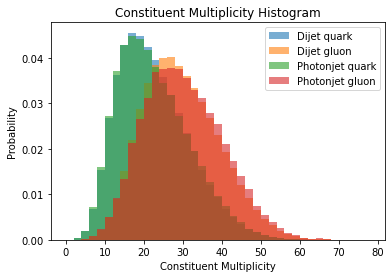

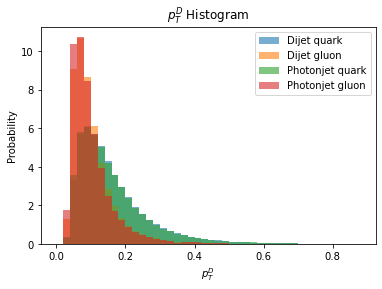

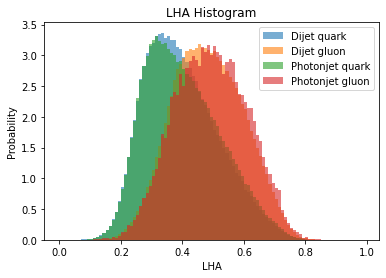

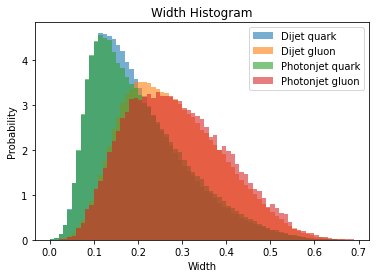

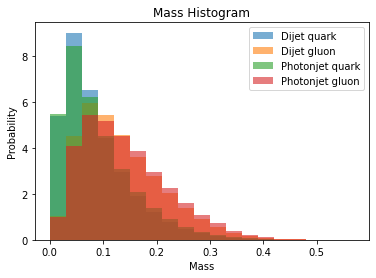

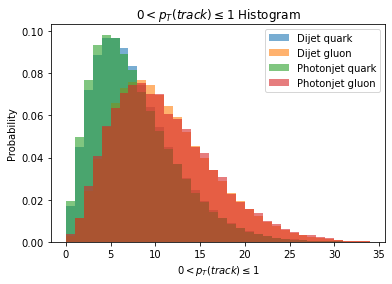

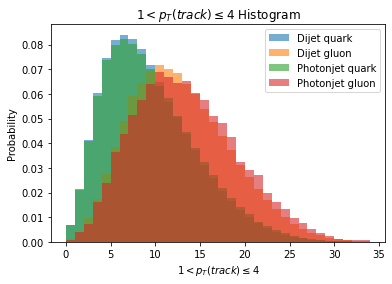

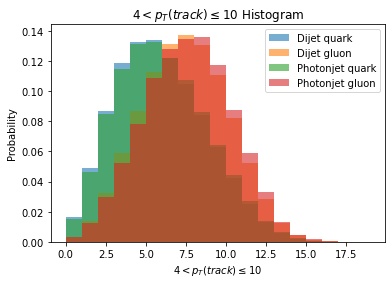

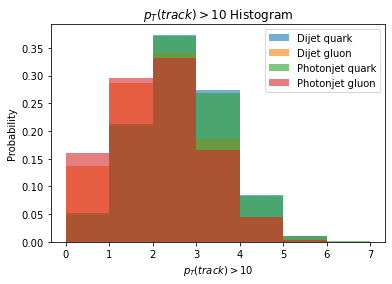

In [100]:
cols = ["multiplicity", "ptd", "lha", "width", "mass", "pt01", "pt14", "pt410", "pt10+"]
titles = ["Constituent Multiplicity", r"$p_T^D$", "LHA", "Width", "Mass", 
          r"$0 < p_T (track) \leq 1$", r"$ 1 <p_T (track) \leq 4$", r"$ 4 <p_T (track) \leq 10$", r"$p_T (track) > 10$"]
bins = [np.arange(0, 80, 2), np.arange(0, .9, .02), np.arange(0, 1, 0.01), np.arange(0, .7, 0.01), np.arange(0, .6, 0.03),
        np.arange(35), np.arange(35), np.arange(20), np.arange(8)]
for i in range(len(cols)):
#     plt.hist(data["dijet"][col], bins=50, alpha=0.6, label="dijet", density=True)
#     plt.hist(data["photonjet"][col], bins=50, alpha=0.6, label="photonjet", density=True)
    col = cols[i]
    plt.hist(data["dijet_quark_truth"][col], alpha=0.6, label="Dijet quark", density=True, bins=bins[i])
    plt.hist(data["dijet_gluon_truth"][col], alpha=0.6, label="Dijet gluon", density=True, bins=bins[i])
    plt.hist(data["photonjet_quark_truth"][col], alpha=0.6, label="Photonjet quark", density=True, bins=bins[i])
    plt.hist(data["photonjet_gluon_truth"][col], alpha=0.6, label="Photonjet gluon", density=True, bins=bins[i])
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel(titles[i])
    plt.title(f"{titles[i]} Histogram")
    plt.savefig(f"plots/{col}.png")
    plt.show()

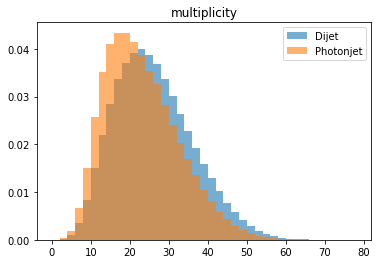

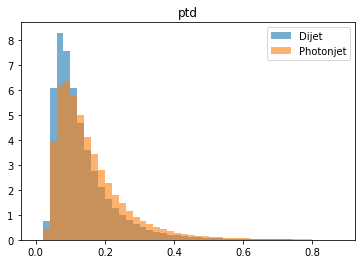

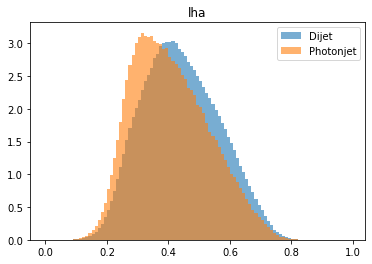

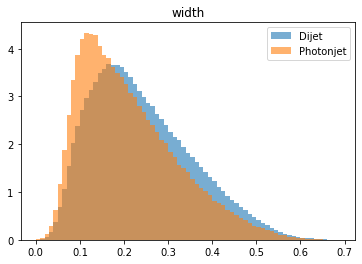

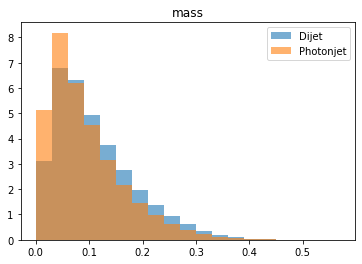

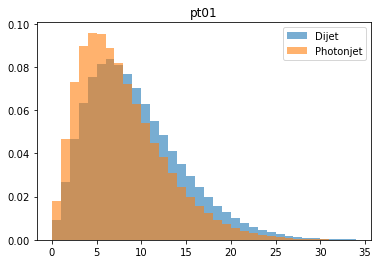

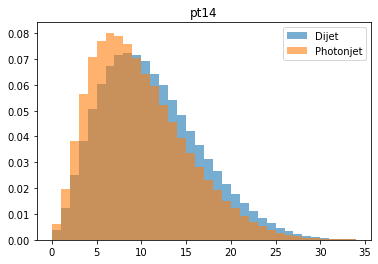

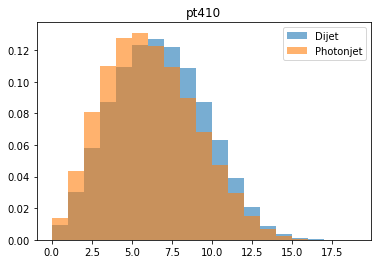

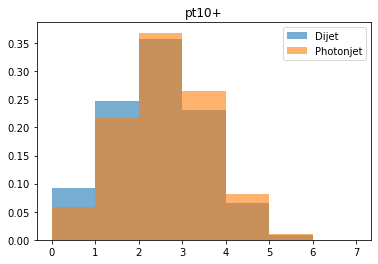

In [101]:
for i in range(len(cols)):
    col = cols[i]
    plt.hist(data["dijet"][col], alpha=0.6, label="Dijet", density=True, bins=bins[i])
    plt.hist(data["photonjet"][col], alpha=0.6, label="Photonjet", density=True, bins=bins[i])
    plt.legend()
    plt.title(col)
    plt.show()

# Reformatting data

In [102]:
cols = ["multiplicity", "ptd", "lha", "width", "mass", "pt01", "pt14", "pt410", "pt10+"]
# cols = ["multiplicity", "ptd", "lha", "width", "mass"]
quark = np.array(data["quark"][cols])
quark_labeled = np.c_[ quark , np.ones(len(data["quark"])) ]
gluon = np.array(data["gluon"][cols])
gluon_labeled = np.c_[ gluon , np.zeros(len(data["gluon"])) ]
dijet = np.array(data["dijet"][cols])
dijet_labeled = np.c_[ dijet , np.ones(len(data["dijet"])) ]
photonjet = np.array(data["photonjet"][cols])
photonjet_labeled = np.c_[ photonjet , np.zeros(len(data["photonjet"])) ]
Xy = np.r_[quark_labeled, gluon_labeled]
Xy.shape
np.random.shuffle(Xy)

Xy_cwola = np.r_[dijet_labeled, photonjet_labeled]

In [103]:
X = (Xy[:, :-1]).astype("long")
y = Xy[:, -1].astype("long")

X_cwola = (Xy_cwola[:, :-1]).astype("long")
y_cwola = Xy_cwola[:, -1].astype("long")

## LDA
Note: row = np.histogram(transform, bins=np.arange(-3, 6, 0.1))[0]

In [12]:
lda = LinearDiscriminantAnalysis()

In [13]:
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [14]:
lda.score(X, y)

0.6585601458259389

In [35]:
quark_pred_lda = lda.transform(quark)
gluon_pred_lda = lda.transform(gluon)

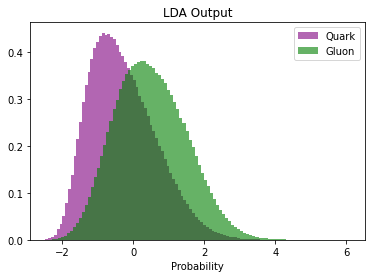

In [36]:
plt.hist(-quark_pred_lda[:,0], density=True, alpha=0.6, bins=100, label="Quark", color="Purple")
plt.hist(-gluon_pred_lda[:,0], density=True, alpha=0.6, bins=100, label="Gluon", color="Green")
plt.legend()
plt.title("LDA Output")
plt.xlabel("Probability")
# plt.savefig("plots/nn_out.png")
plt.show()

In [32]:
dijet_pred_lda = lda.transform(dijet)
photonjet_pred_lda = lda.transform(photonjet)

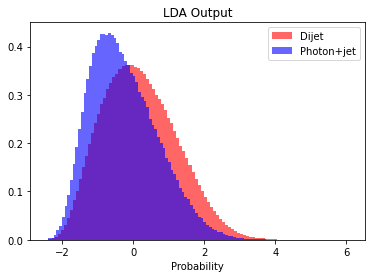

In [34]:
plt.hist(-dijet_pred_lda[:,0], density=True, alpha=0.6, bins=100, label="Dijet", color="Red")
plt.hist(-photonjet_pred_lda[:,0], density=True, alpha=0.6, bins=100, label="Photon+jet", color="Blue")
plt.legend()
plt.title("LDA Output")
plt.xlabel("Probability")
# plt.savefig("plots/nn_out.png")
plt.show()

## AdaBoost

In [65]:
ab = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)

In [66]:
ab.fit(X, y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=250)

In [67]:
ab.score(X, y)

0.6611026611857402

In [68]:
quark_pred_ab = ab.predict_proba(quark)
gluon_pred_ab = ab.predict_proba(gluon)

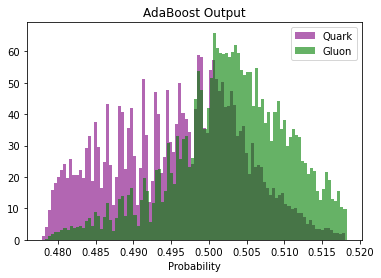

In [69]:
plt.hist(quark_pred_ab[:,0], density=True, alpha=0.6, bins=100, label="Quark", color="Purple")
plt.hist(gluon_pred_ab[:,0], density=True, alpha=0.6, bins=100, label="Gluon", color="Green")
plt.legend()
plt.title("AdaBoost Output")
plt.xlabel("Probability")
# plt.savefig("plots/nn_out.png")
plt.show()

In [70]:
dijet_pred_ab = ab.predict_proba(dijet)
photonjet_pred_ab = ab.predict_proba(photonjet)

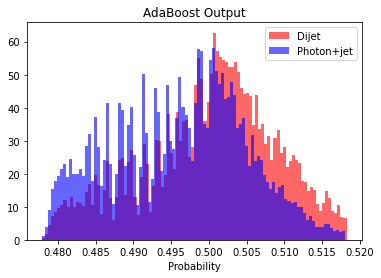

In [71]:
plt.hist(dijet_pred_ab[:,0], density=True, alpha=0.6, bins=100, label="Dijet", color="Red")
plt.hist(photonjet_pred_ab[:,0], density=True, alpha=0.6, bins=100, label="Photon+jet", color="Blue")
plt.legend()
plt.title("AdaBoost Output")
plt.xlabel("Probability")
# plt.savefig("plots/nn_out.png")
plt.show()

## Simpler NN

In [42]:
nn2 = MLPClassifier(hidden_layer_sizes=[32, 32], learning_rate_init=0.001, random_state=1)

In [43]:
nn2.fit(X, y)

MLPClassifier(hidden_layer_sizes=[32, 32], random_state=1)

In [45]:
nn2.score(X, y)

0.6621286143094652

In [116]:
quark_pred_nn2 = nn2.predict_proba(quark)
gluon_pred_nn2 = nn2.predict_proba(gluon)

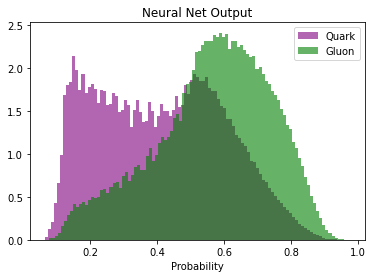

In [213]:
# plt.hist(nn2.predict_proba(X[y==0])[:,1]/clf.predict_proba(X[y==0])[:,0], density=True, alpha=0.6, bins=50)
# plt.hist(nn2.predict_proba(X[y==1])[:,1]/clf.predict_proba(X[y==1])[:,0], density=True, alpha=0.6, bins=50)
plt.hist(nn2.predict_proba(quark)[:,0], density=True, alpha=0.6, bins=100, label="Quark", color="Purple")
plt.hist(nn2.predict_proba(gluon)[:,0], density=True, alpha=0.6, bins=100, label="Gluon", color="Green")
plt.legend()
plt.title("Neural Net Output")
plt.xlabel("Probability")
plt.savefig("plots/nn_out.png")
plt.show()

In [215]:
dijet_pred_nn = nn2.predict_proba(dijet)
photonjet_pred_nn = nn2.predict_proba(photonjet)

In [216]:
dijet_transform = dijet_pred_nn[:,0]
# dijet_transform = dijet_res[:, 1] / dijet_res[:, 0]
photonjet_transform = photonjet_pred_nn[:,0]
# photonjet_transform = photonjet_res[:, 1] / photonjet_res[:, 0]

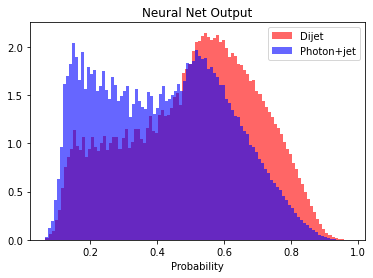

In [217]:
plt.hist(dijet_transform, density=True, alpha=0.6, bins=100, label="Dijet", color="red")
plt.hist(photonjet_transform, density=True, alpha=0.6, bins=100, label="Photon+jet", color="blue")
plt.legend()
plt.title("Neural Net Output")
plt.xlabel("Probability")
plt.savefig("plots/nn_out_input.png")
plt.show()

## Hist Gradient Boosting

In [197]:
clf = HistGradientBoostingClassifier(
    loss="binary_crossentropy",
    learning_rate=0.1
)

In [198]:
clf.fit(X, y)

HistGradientBoostingClassifier(loss='binary_crossentropy')

In [199]:
clf.score(X, y)

0.6621541771089063

In [200]:
quark_pred_clf = clf.predict_proba(quark)
gluon_pred_clf = clf.predict_proba(gluon)

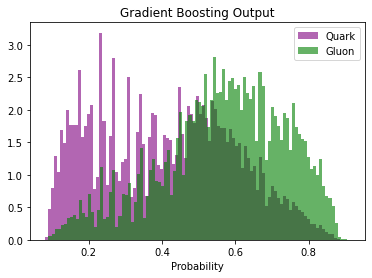

In [225]:
# plt.hist(clf.predict_proba(X[y==0])[:,1]/clf.predict_proba(X[y==0])[:,0], density=True, alpha=0.6, bins=50)
# plt.hist(clf.predict_proba(X[y==1])[:,1]/clf.predict_proba(X[y==1])[:,0], density=True, alpha=0.6, bins=50)
plt.hist(clf.predict_proba(quark)[:,0], density=True, alpha=0.6, bins=100, label="Quark", color="Purple")
plt.hist(clf.predict_proba(gluon)[:,0], density=True, alpha=0.6, bins=100, label="Gluon", color="Green")
plt.legend()
plt.title("Gradient Boosting Output")
plt.xlabel("Probability")
plt.savefig("plots/gb_out.png")
plt.show()

In [219]:
dijet_pred_clf = clf.predict_proba(dijet)
photonjet_pred_clf = clf.predict_proba(photonjet)

In [221]:
dijet_transform = dijet_pred_clf[:, 0]
# dijet_transform = dijet_res[:, 1] / dijet_res[:, 0]
photonjet_transform = photonjet_pred_clf[:, 0]
# photonjet_transform = photonjet_res[:, 1] / photonjet_res[:, 0]

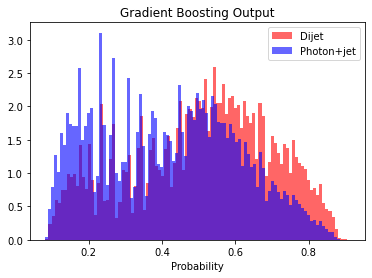

In [224]:
plt.hist(dijet_transform, density=True, alpha=0.6, bins=100, label="Dijet", color="red")
plt.hist(photonjet_transform, density=True, alpha=0.6, bins=100, label="Photon+jet", color="blue")
plt.legend()
plt.title("Gradient Boosting Output")
plt.xlabel("Probability")
plt.savefig("plots/gb_out_input.png")
plt.show()

## Random Forest

In [93]:
rf = RandomForestClassifier(random_state=0)

In [94]:
rf.fit(X, y)

RandomForestClassifier(random_state=0)

In [49]:
rf.score(X, y)

0.6230134400823371

In [104]:
quark_pred_rf = rf.predict_proba(quark)
gluon_pred_rf = rf.predict_proba(gluon)

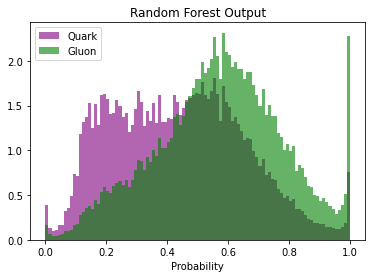

In [105]:
# plt.hist(rf.predict_proba(quark)[:,1]/(rf.predict_proba(quark)[:,0]+1e-2), density=True, alpha=0.6, bins=50)
# plt.hist(rf.predict_proba(gluon)[:,1]/(rf.predict_proba(gluon)[:,0]+1e-2), density=True, alpha=0.6, bins=50)
plt.hist(quark_pred_rf[:,0], density=True, alpha=0.6, bins=100, label="Quark", color="Purple")
plt.hist(gluon_pred_rf[:,0], density=True, alpha=0.6, bins=100, label="Gluon", color="Green")
plt.legend()
plt.title("Random Forest Output")
plt.xlabel("Probability")
plt.savefig("plots/rf_out.png")
plt.show()

In [106]:
dijet_pred_rf = rf.predict_proba(dijet)
photonjet_pred_rf = rf.predict_proba(photonjet)

In [107]:
# dijet_transform = dijet_res[:, 1]
dijet_transform = dijet_pred_rf[:, 0]
# dijet_transform = dijet_res[:, 1] / (dijet_res[:, 0] + 0.01)
# photonjet_transform = photonjet_res[:, 1]
photonjet_transform = photonjet_pred_rf[:, 0]
# photonjet_transform = photonjet_res[:, 1] / (photonjet_res[:, 0] + 0.01)

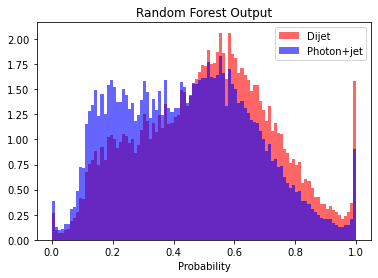

In [108]:
plt.hist(dijet_transform, density=True, alpha=0.6, bins=100, label="Dijet", color="red")
plt.hist(photonjet_transform, density=True, alpha=0.6, bins=100, label="Photon+jet", color="blue")
plt.legend()
plt.title("Random Forest Output")
plt.xlabel("Probability")
plt.savefig("plots/rf_out_input.png")
plt.show()

In [55]:
dijet_q = len(dijet[dijet_transform==0])/len(dijet)
dijet_g = len(dijet[dijet_transform==1])/len(dijet)
photonjet_q = len(photonjet[photonjet_transform==0])/len(photonjet)
photonjet_g = len(photonjet[photonjet_transform==1])/len(photonjet)

In [56]:
kappa12 = dijet_q / photonjet_q
kappa21 = photonjet_g / dijet_g

In [57]:
kappa12

0.7078524727129278

In [58]:
kappa21

0.5623832281248908

In [23]:
fracs = {'etaleq1_pt80100histogram_pp80': (0.8653073490795926,
  0.42345593454900876,
  0.06125424167413664,
  0.062376975991407894),
 'etaleq1_pt80100histogram_pbpb80_0_10_wide': (0.7333725387665618,
  0.39779180490219096,
  0.04505093281265221,
  0.04679681996870372),
 'lda_pt80100_trkpt0:1:4:10_pp80': (0.8648503513093285,
  0.4206399476107181,
  0.17777883929606364,
  0.1780108308586244),
 'lda_pt80100_trkpt0:1:4:10_pbpb80_0_10_wide': (0.7007832112434045,
  0.36416749100070556,
  0.04338585985085407,
  0.05699378440236159),
 'lda_pt80100_trkpt0:1:4:10_cwola_pp80': (0.9511299018427014,
  0.45042857040067336,
  0.05928697125947313,
  0.06132162269239023),
 'lda_pt80100_trkpt0:1:4:10_cwola_pbpb80_0_10_wide': (0.7551863518399543,
  0.4162443740132577,
  0.0511937617434553,
  0.052230895104178825),
 'pp_pt80100_trkpt0:1:4:10': (0.9257073716455964, 0.41453260297645933, 0, 0),
 'PbPbWide_pt80100_trkpt0:1:4:10': (0.936867758911176,
  0.46665553774928775,
  0,
  0)}

In [24]:
def calc_individ_fracs(kappa_ab, kappa_ba):
    den = 1 - kappa_ab * kappa_ba
    fa = (1 - kappa_ab) / den
    fb = (kappa_ba - kappa_ab * kappa_ba) / den
    return fa, fb

In [25]:
kappa21, kappa12

(0.1291959816297687, 0.40913378309863013)

In [26]:
f1, f2 = calc_individ_fracs(kappa21, kappa12)
f1, f2

(0.9194021842279836, 0.3761584938223386)

In [27]:
f1_truth, f2_truth = 0.9257073716455964, 0.41453260297645933

In [28]:
f2_truth/f1_truth

0.4478009095245291

In [29]:
(1-f1_truth) / (1-f2_truth)

0.12689456105002625

In [30]:
# xticks = [0, 0.2, 0.4, 0.6, 0.8]
# xlabels = ["Const Mult", "Mult LDA", "Mult CWoLa", "Obs LDA", "Obs CWoLa"]
xticks = [0, 0.2, 0.4, 0.6]
xlabels = ["Const Mult", "Mult q/g", "Mult CWoLa", "Rand Forest"]
xlim = (-0.1, 0.7)
ylim = (-.1, 1.1)

In [31]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='none', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe, y - ye), 2*xe.sum(), 2*ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

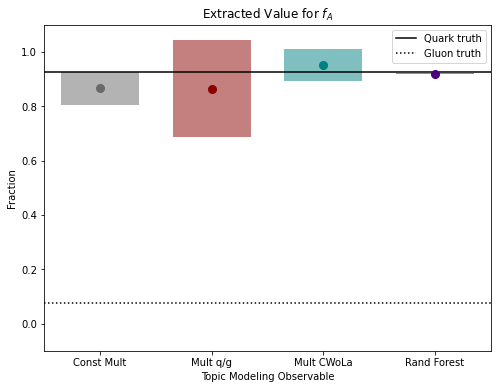

In [32]:
pp_truth = "pp_pt80100_trkpt0:1:4:10"
og_prefix = "etaleq1_pt80100histogram"
og_prefix = "etaleq1_pt80100histogram"
mult_prefix = "lda_pt80100_trkpt0:1:4:10"
obs_prefix = "TMVAObs_lda_pt80100"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=fracs[pp_truth][0], color='k', linestyle='-', label="Quark truth")
ax.axhline(y=1-fracs[pp_truth][0], color='k', linestyle=':', label="Gluon truth")

ax.plot([0], fracs[f"{og_prefix}_pp80"][0], color='dimgrey', marker='o', markersize=8)
make_error_boxes(ax, [0], [fracs[f"{og_prefix}_pp80"][0]], np.array([0.07]), np.array([fracs[f"{og_prefix}_pp80"][2]]), facecolor='dimgrey')

ax.plot([0.2], fracs[f"{mult_prefix}_pp80"][0], color='darkred', marker='o', markersize=8)
make_error_boxes(ax, [0.2], [fracs[f"{mult_prefix}_pp80"][0]], np.array([0.07]), np.array([fracs[f"{mult_prefix}_pp80"][2]]), facecolor='darkred')

ax.plot([0.4], fracs[f"{mult_prefix}_cwola_pp80"][0], color='teal', marker='o', markersize=8)
make_error_boxes(ax, [0.4], [fracs[f"{mult_prefix}_cwola_pp80"][0]], np.array([0.07]), np.array([fracs[f"{mult_prefix}_cwola_pp80"][2]]), facecolor='teal')

ax.plot([0.6], f1, color='indigo', marker='o', markersize=8)
make_error_boxes(ax, [0.6], [f1], np.array([0.07]), np.array([0.001]), facecolor='indigo')

ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_ylim(ylim)
ax.legend()
ax.set_title(r"Extracted Value for $f_A$")
ax.set_ylabel("Fraction")
ax.set_xlabel("Topic Modeling Observable")
# plt.savefig("thesis/ppf1.png")
plt.show()

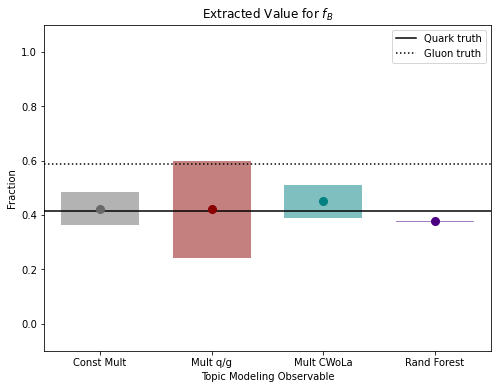

In [33]:
# pp f2
fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=fracs[pp_truth][1], color='k', linestyle='-', label="Quark truth")
ax.axhline(y=1-fracs[pp_truth][1], color='k', linestyle=':', label="Gluon truth")

ax.plot([0], fracs[f"{og_prefix}_pp80"][1], color='dimgrey', marker='o', markersize=8)
make_error_boxes(ax, [0], [fracs[f"{og_prefix}_pp80"][1]], np.array([0.07]), np.array([fracs[f"{og_prefix}_pp80"][3]]), facecolor='dimgrey')

ax.plot([0.2], fracs[f"{mult_prefix}_pp80"][1], color='darkred', marker='o', markersize=8)
make_error_boxes(ax, [0.2], [fracs[f"{mult_prefix}_pp80"][1]], np.array([0.07]), np.array([fracs[f"{mult_prefix}_pp80"][3]]), facecolor='darkred')

ax.plot([0.4], fracs[f"{mult_prefix}_cwola_pp80"][1], color='teal', marker='o', markersize=8)
make_error_boxes(ax, [0.4], [fracs[f"{mult_prefix}_cwola_pp80"][1]], np.array([0.07]), np.array([fracs[f"{mult_prefix}_cwola_pp80"][3]]), facecolor='teal')

ax.plot([0.6], f2, color='indigo', marker='o', markersize=8)
make_error_boxes(ax, [0.6], [f2], np.array([0.07]), np.array([0.001]), facecolor='indigo')

ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_ylim(ylim)
ax.legend(loc='upper right')
ax.set_title(r"Extracted Value for $f_B$")
ax.set_ylabel("Fraction")
ax.set_xlabel("Topic Modeling Observable")
# plt.savefig("thesis/ppf2.png")
plt.show()

In [34]:
quark_accurate = quark[quark_pred_rf[:,1]==1]
gluon_accurate = gluon[gluon_pred_rf[:,0]==1]

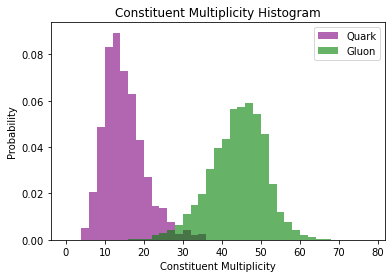

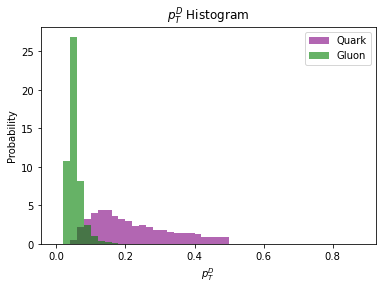

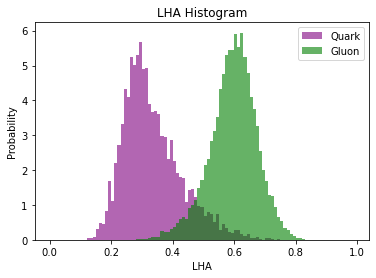

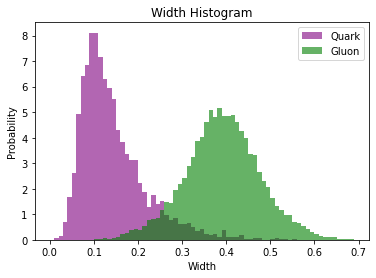

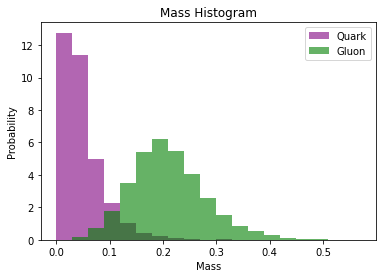

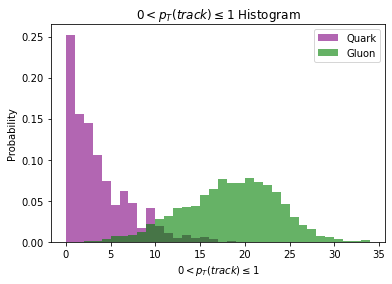

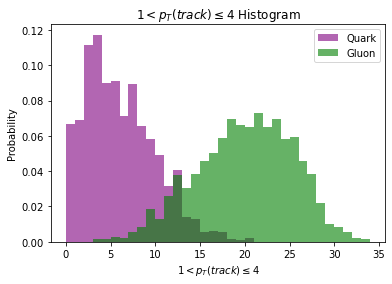

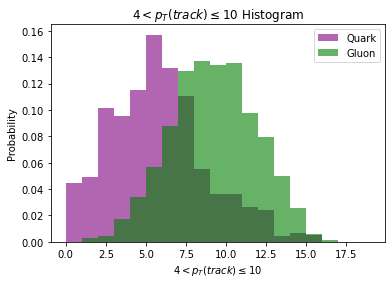

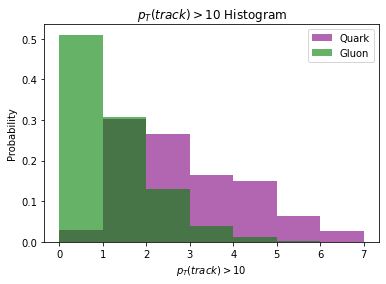

In [36]:
for i in range(len(cols)):
    col = cols[i]
    plt.hist(quark_accurate[:,i], alpha=0.6, label="Quark", density=True, bins=bins[i], color="purple")
    plt.hist(gluon_accurate[:,i], alpha=0.6, label="Gluon", density=True, bins=bins[i], color="green")
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel(titles[i])
    plt.title(f"{titles[i]} Histogram")
    plt.show()

# Exporting Data

In [46]:
import csv

rows = []
# for i in range(len(inputs)):
#     d = inputs[i]
#     transform = rf.predict_proba(d)[:, 0] * nn2.predict_proba(d)[:, 0]
#     row = np.histogram(transform, bins=np.arange(0, 1.5, 0.01))[0]
#     rows.append([f"pp80{input_labels[i]}"] + list(row))
#     rows.append([f"pp80{input_labels[i]}_error"] + list(np.sqrt(row)))

labels = ["dijet", "photonjet", "dijet_gluon_truth", "dijet_quark_truth", "photonjet_gluon_truth", "photonjet_quark_truth"]

for label in labels:
    d = np.array(data[label][cols])
    transform = -lda.transform(d)[:, 0]
#     row = np.histogram(transform, bins=np.arange(0, 1.05, 0.01))[0]
    row = np.histogram(transform, bins=np.arange(-3, 6, 0.1))[0]
    if "dijet" in label:
        label = label[5:]
    else:
        label = "_"+label
#     rows.append([f"pbpb80_0_10_wide{label}"] + list(row))
#     rows.append([f"pbpb80_0_10_wide{label}_error"] + list(np.sqrt(row)))
    rows.append([f"pp80{label}"] + list(row))
    rows.append([f"pp80{label}_error"] + list(np.sqrt(row)))

with open(f"lda_transform_pt80100.csv", "w+") as f:
    spamwriter = csv.writer(f, delimiter=',')
    for row in rows:
        spamwriter.writerow(row)

# AUC/ROC

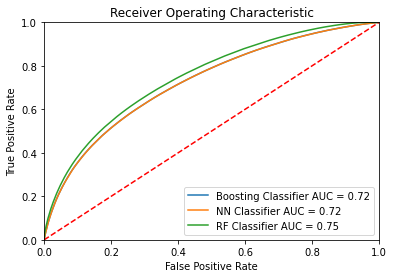

In [231]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

classifiers = [clf, nn2, rf]
names = ["Boosting Classifier", "NN Classifier", "RF Classifier"]

plt.title('Receiver Operating Characteristic')
for i in range(len(classifiers)):
    c = classifiers[i]
    probs = c.predict_proba(X)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'{names[i]} AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("plots/ROC.png")
plt.show()

# Write to csv for jet topics

In [144]:
import csv

inputs = [dijet, photonjet]
input_labels = ["", "_photonjet"]
        
classifiers = [clf, nn2]
class_labels = ["bdt", "nn"]
for j in range(len(classifiers)):
    c = classifiers[j]
    rows = []
    for i in range(len(inputs)):
        d = inputs[i]
        transform = c.predict_proba(d)
        row = np.histogram(transform[:,1]/transform[:,0], bins=np.arange(0, 15.1, 0.1))[0]
        rows.append([f"pp80{input_labels[i]}"] + list(row))
        rows.append([f"pp80{input_labels[i]}_error"] + list(np.sqrt(row)))

    labels = ["dijet_gluon_truth", "dijet_quark_truth", "photonjet_gluon_truth", "photonjet_quark_truth"]

    for label in labels:
        d = np.array(data[label][cols])
        transform = c.predict_proba(d)
        row = np.histogram(transform[:,1]/transform[:,0], bins=np.arange(0, 15.1, 0.1))[0]
        rows.append([f"pp80_{label}"] + list(row))
        rows.append([f"pp80_{label}_error"] + list(np.sqrt(row)))

    with open(f"{class_labels[j]}_pt80100.csv", "w+") as f:
        spamwriter = csv.writer(f, delimiter=',')
        for row in rows:
            spamwriter.writerow(row)